In [28]:
import pandas as pd
pandas.set_option('display.max_columns', 10)
pandas.set_option('display.width', 350)
 
#read from google drive
data=pandas.read_csv("https://drive.google.com/uc?export=download&id=1LU5be_H1TD2Pp1OmI202to3YyKo9AzFY")
 
print(data.head())

  country  age  new_user source  total_pages_visited  converted
0      UK   25         1    Ads                    1          0
1      US   23         1    Seo                    5          0
2      US   28         1    Seo                    4          0
3   China   39         1    Seo                    5          0
4      US   30         1    Seo                    6          0


country : user country based on the IP address 

age : user age. Self-reported at sign-up step 

new_user : whether the user created the account during this session 
or had already an account and simply came back to the site 

source : marketing channel source

Ads: came to the site by clicking on an advertisement

Seo: came to the site by clicking on search results

Direct: came to the site by directly typing the URL on the browser 

total_pages_visited: number of total pages visited during the 
session. This can be seen as a proxy for time spent on site and 
engagement

In [13]:
# check outliers
print(data[data['age']>105], data[data['age'] < 5])


        country  age  new_user source  total_pages_visited  converted
90928   Germany  123         0    Seo                   15          1
295581       UK  111         0    Ads                   10          1 Empty DataFrame
Columns: [country, age, new_user, source, total_pages_visited, converted]
Index: []


In [14]:
data = data[data['age'] < 110]

<AxesSubplot:xlabel='country'>

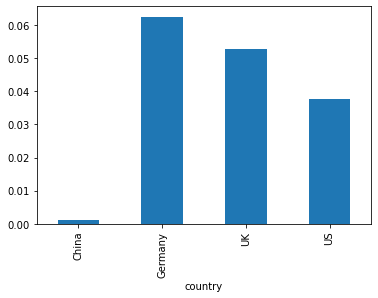

In [15]:
data.groupby(['country'])['converted'].mean().plot.bar()

<AxesSubplot:xlabel='age'>

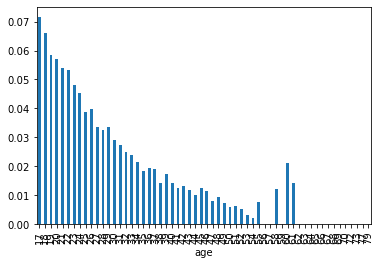

In [16]:
data.groupby(['age'])['converted'].mean().plot.bar()

<AxesSubplot:xlabel='source'>

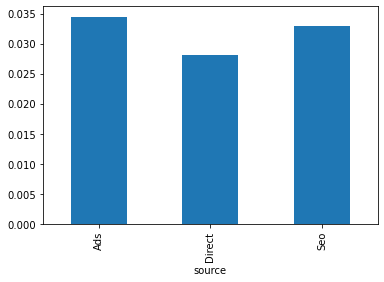

In [17]:
data.groupby(['source'])['converted'].mean().plot.bar()

<AxesSubplot:xlabel='total_pages_visited'>

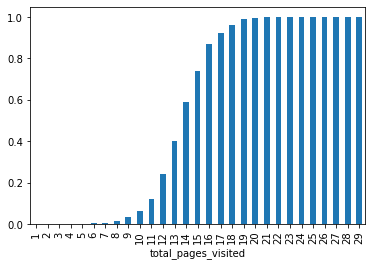

In [18]:
data.groupby(['total_pages_visited'])['converted'].mean().plot.bar()

<AxesSubplot:xlabel='new_user'>

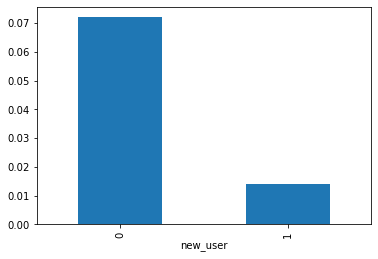

In [20]:
data.groupby(['new_user'])['converted'].mean().plot.bar()

In [21]:
data.corr()

,age,new_user,total_pages_visited,converted
age,1.000000,0.012445,-0.046093,-0.089199
new_user,0.012445,1.000000,-0.082522,-0.152338
total_pages_visited,-0.046093,-0.082522,1.000000,0.528975
converted,-0.089199,-0.152338,0.528975,1.000000


# Machine Learning Model

In [25]:
# the dependent variable is a binary variable, we can use random forest classifier
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [32]:
data2 = pd.get_dummies(data,drop_first=True)

In [33]:
np.random.seed(123)
  
# split data
train, test = train_test_split(data2, test_size = 0.34)

In [34]:
# build model
rf = RandomForestClassifier(n_estimators=100, max_features=3, oob_score=True)
rf.fit(train.drop('converted', axis=1), train['converted'])

RandomForestClassifier(max_features=3, oob_score=True)

In [36]:
# confusion matrix
test_data = test.drop('converted', axis=1)
test_pred = rf.predict(test_data)


pd.DataFrame(confusion_matrix(test['converted'], test_pred, labels=[0, 1]))


,0,1
0,103595,545
1,1043,2326


In [37]:
# test accuracy 
rf.score(test_data,test['converted'])

0.9852291436065818

<AxesSubplot:>

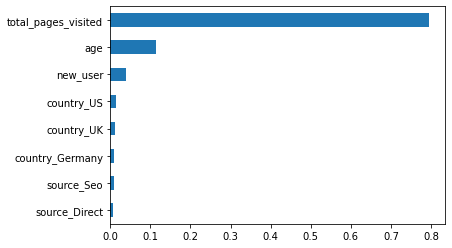

In [38]:
importances = pd.Series(rf.feature_importances_, index=train.drop('converted', axis=1).columns)
importances.sort_values().plot(kind='barh')

In [40]:
test_pred_prob = rf.predict_proba(test_data)
test_pred_prob_pos = test_pred_prob[:,1]
test_pred_prob_pos
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(test['converted'].values, test_pred_prob_pos, pos_label = 1)
roc_auc = auc(false_positive_rate, true_positive_rate)

Text(0.5, 0, 'False Positive Rate')

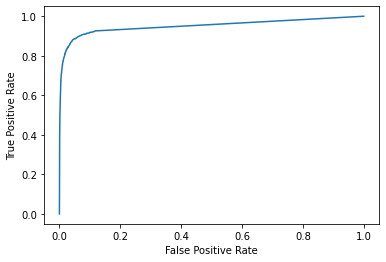

In [46]:
import matplotlib.pyplot as plt
plt.plot(false_positive_rate, true_positive_rate)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

From the above visualizations, we get that users with high convertion rate are expected to be new user, with toal_pages_visited >= 15, age <= 30, and location is not China.

# Next Steps
1. Do opportunity sizing by user segmentation
2. Put more ads in channels which can help acquire those kinds of users:
    a.young people 
    b.new user
    c.German user
3. Find strategy to increase the total page visits per user
4. Figure out what happend to Chinese users
5. Figure out why elder people and old user tend to convert less